# Assignment 1
# CS 686
# Author:  Kamran Karim


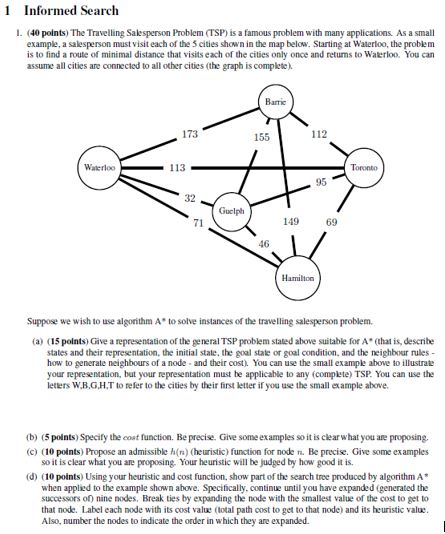

In [20]:
from IPython.display import Image

fig = Image(filename=("Q1.JPG"))
fig


# Solution a

The A* search uses the past costs and teh heuristic values.
The representation of any arbitrary state (say at node n) that I propose would be something like: <$c_0, c_1, .....,c_i, p_{i+1}, ....., p_k, c_0$>
where $c_0$ is the starting and ending city, $c_i$'s represent the city that have already been visited, where as $p_j$'s represent the cities that the sales man will visit in order to reach to its goal.

For this particular example, as we have 5 nodes, the initial state would look like : $<W, ?, ?, ?, ?, ?>$, I.e., we will start at the waterloo node (W), and all other paths spaces will be unknown and will be known as the paths are checked.
The Goal state will be like $<W, a_1, a_2, a_3, a_4, W>$ where $a_i$ will be determine the node that is travelled in the order of teh indexes. Note futher that $a_i \ne a_j \ when \ i\ne j$

For the travelling salesman problem in general, the traveller can go from any given node to any other node, as the all the nodes are connected to each other by some arc. The neighbour rule is that one cannot visit its neighbour, if the neighbour has already been visited (except if it is the initial node, which in this case is Waterloo). This rule limits this movement from one neighbour to another.

Finally, the cost of going from one node to its neighbour node is simply the distance between the two nodes.

# Solution b

Using the definition of the cost, that we have defined in the previous answer we will expand it to define our cost fucntion. The cost to reach to a particular node will simply be the some of all costs of the arcs it had travelled in its path to reach to that node. Recall from previous part, the cost of an arc is the distance between the two nodes that the arc connects. 
So for this particular example, if the salesman uses the following path to reach Guelph(G) <W, H, G> then the cost to reach G in this particular path would be = 71 + 46 = 117.

# Solution c

There can be quite a lot of heuristics that will be admissible in this situation. One I could think off that seem to quickly reach to the optimal solution is the one that would sum the minimum costs from each node that has not been visited. So, using our representation, <$c_0, c_1, .....,c_i, p_{i+1}, ....., p_k, c_0$>, lets suppose we are at node n, which in our representation will have the transformed representation of $c_i$. Now we will look at the minimum of the cost of all arcs that are going from the node $c_i$ to any other node that has not been visited from <$p_{i+1}, ....., p_k, c_0$>. We choose the minimum of such arcs, and call it $d_1$. $d_2, .. , d_j$ will be defined as the subsequent minimum lengths of arcs going out of each of the remaining untravelled nodes, and finally $d_{j+1}$ will be the minimum distance of one of those nodes to the node $c_0$. 

For clarafication, look at the example given, assume we are at node Toronto, and used the path to each there: $<W, H, T>$. The untravelled nodes are Barrrie and Guelph. And hence the minimum distance from Toronto to any other node is 95 to Guelph. The minimum distance between the untravelled nodes is 155 and the minimum distance between the untravelled nodes and the final position is 32 between guelph and waterloo. Hence, the value of this heuristic will be h(n) =  95 + 155 + 32 = 282


Note that (although not required) this heuristic is monotone, in addition to being admissible, the heuristic will always underestimate the cost, is greater than 0 and the branching factor is finite. Further, as we are looking at the minimum cost of arcs coming out of each node which is untravelled, which will always be less than or equal to the actual cost of the path from that node to the goal. Further, for the same reason, $h(n)\leq h(n+i) + cost(n, n+i)$ for any i, as each time an arc is travelled, the minimum distances have limitations on the values it can take. Hence, this heuristic function is admissible and Monotone.



# solution d

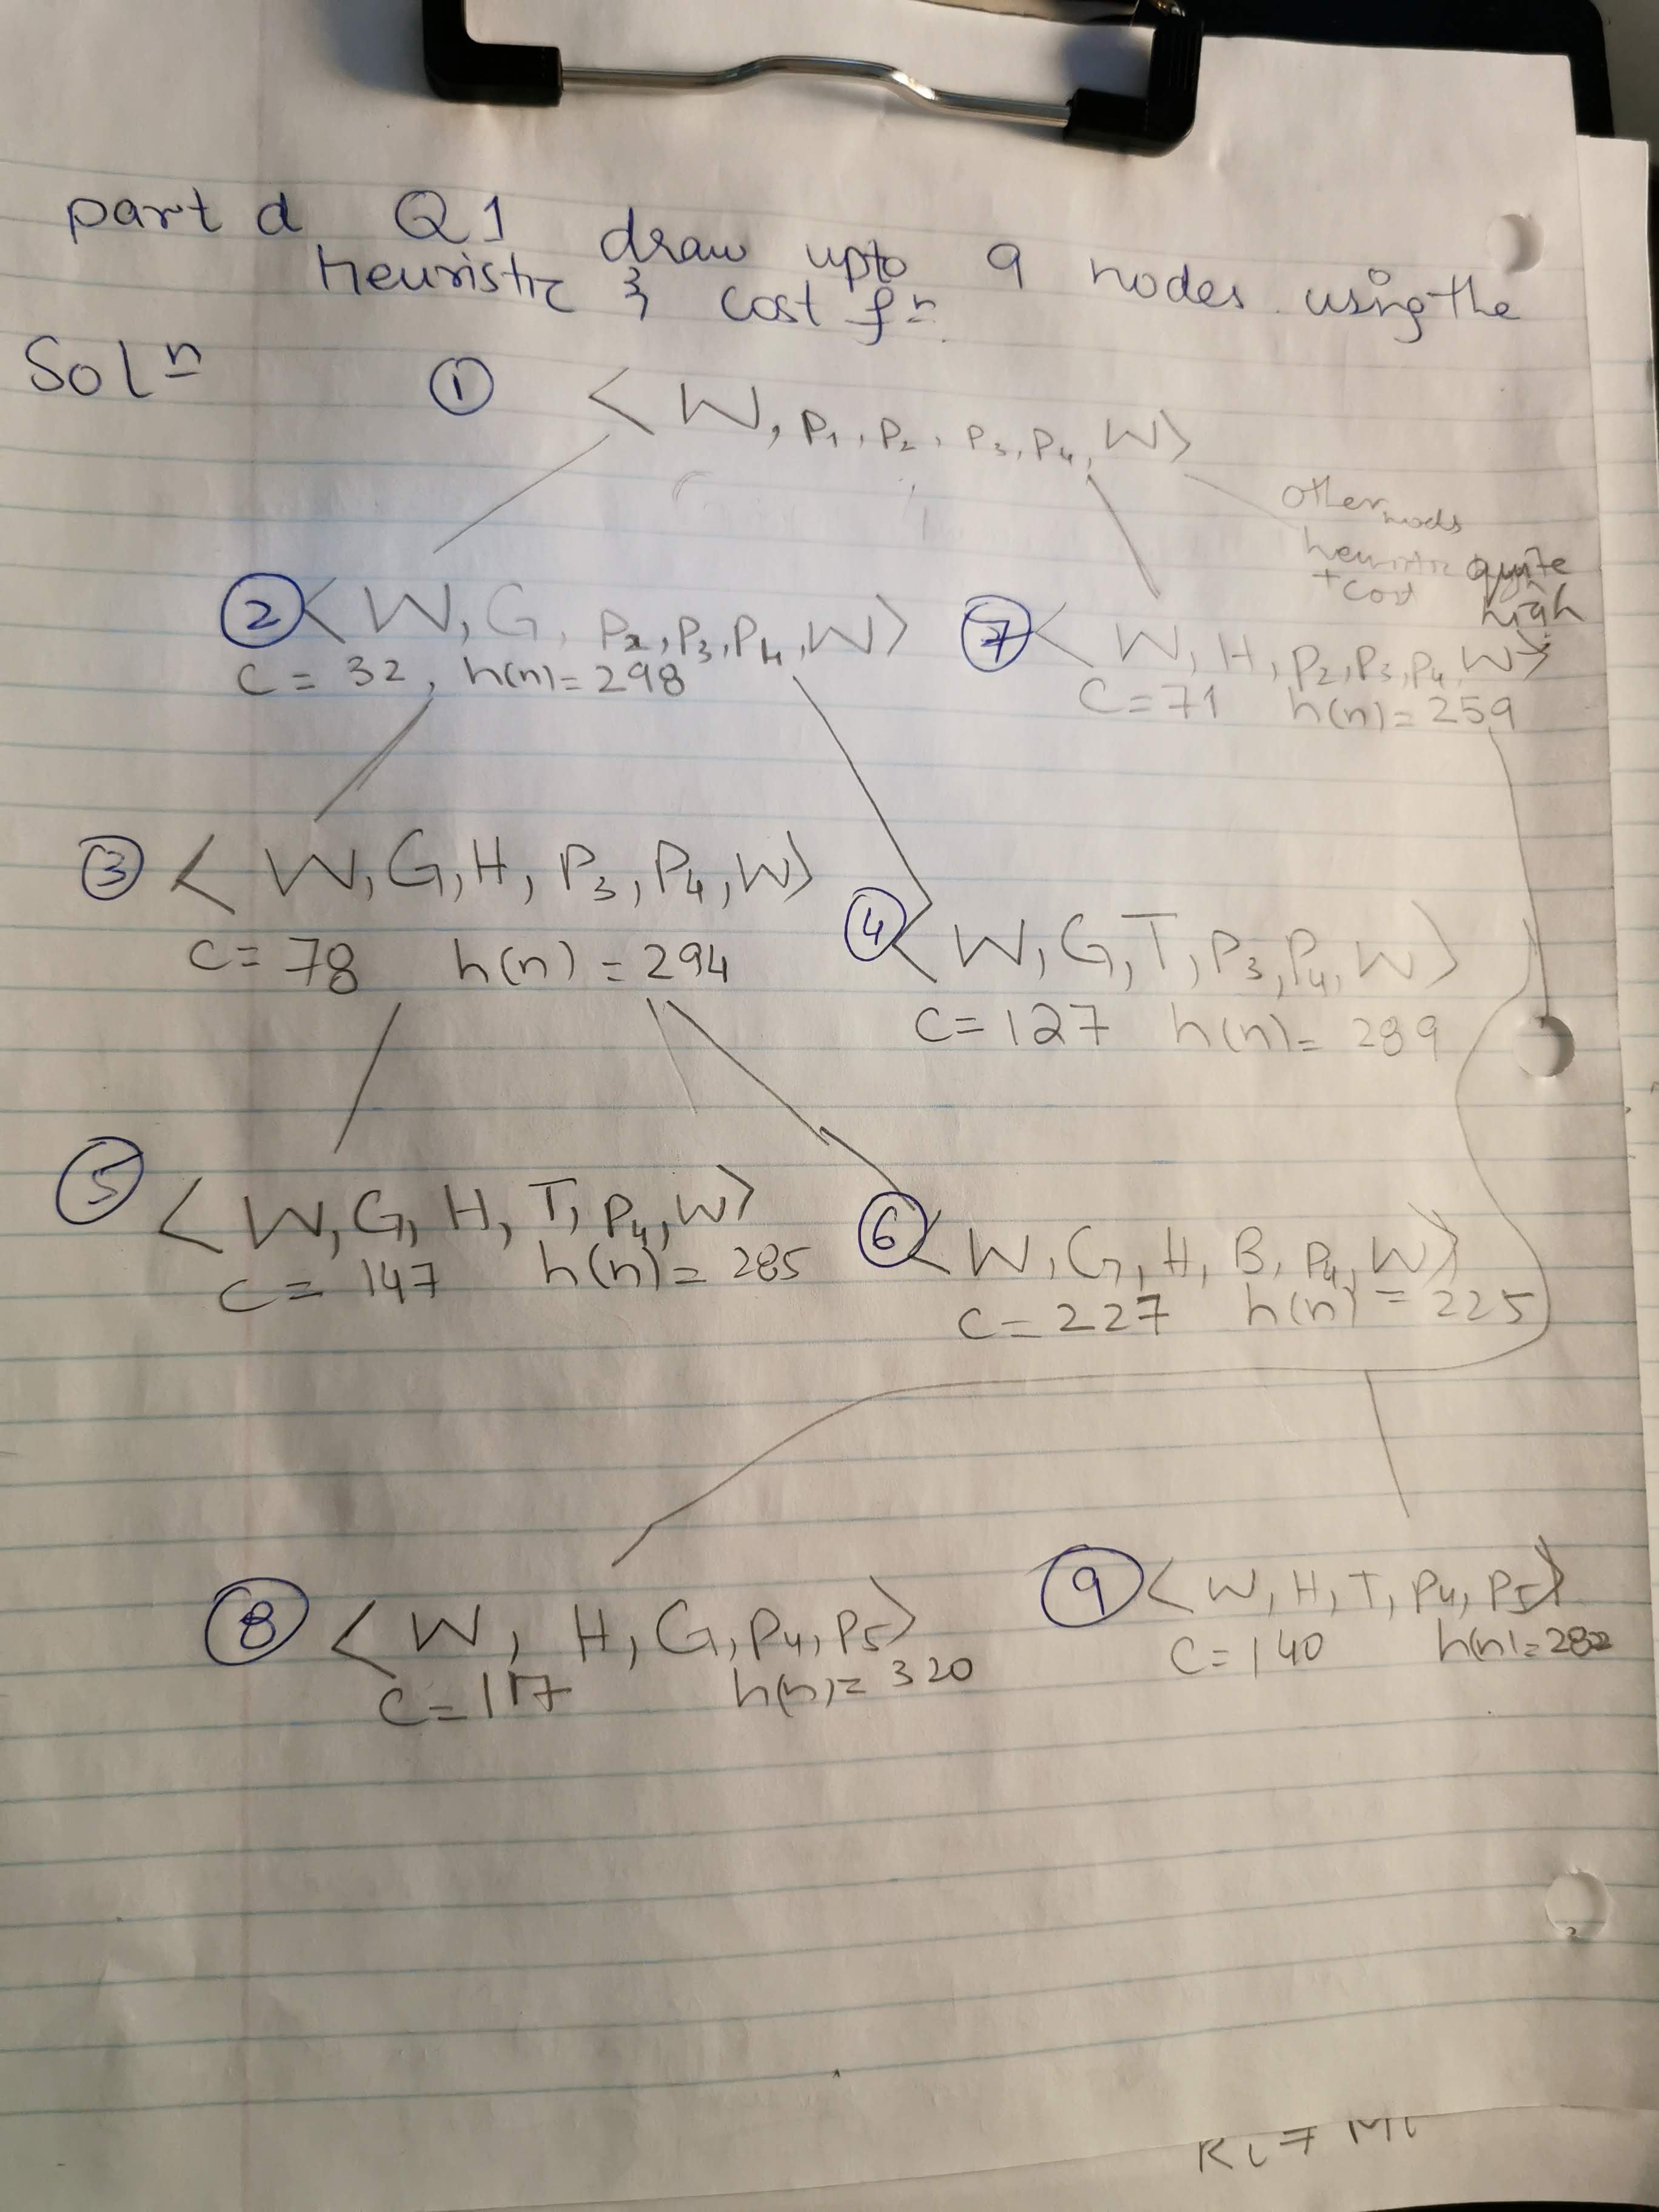

In [21]:
fig = Image(filename=("part_d.jpg"))
fig

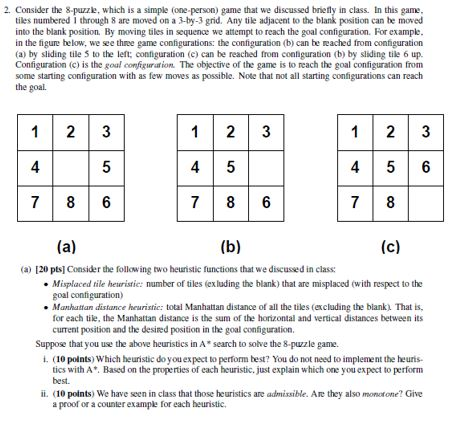

In [22]:
fig = Image(filename=("Q2.JPG"))
fig

# Solution part a

Note that both heuristics will lead to the goal. But when it comes to the comparison of the two heuristics, we will look at which is more likely to reach to the solution faster than the other. 
First, lets understand the two heuristics better.
In the misplaced tile heuristic, the algorithm will tell for each move if there are equal number, 1 less or 1 more misplaced tiles if a move is made. And the heuristic take into account just this information. Note that, it might be the case that a move has the same number of misplaced tiles, but the tile is closer to its goal position, but using this heuristic, the algorithm will neglect that information, and consider it a bad move, and might move on to check other posibilities. The algorithm will eventually come back to that position or take another route, but it will take much longer for the algorithm to reach the solution.
On the other hand Manhattan distance heuristic tells how far each tile is from its goal position, so a move to a position which is not the goal position will still be considered a betterment, if it is closer to goal position and will be pursued. This way the algorithm will have more chances of reaching the solution earlier than the misplaced tile heuristic.

Note that there might be cases, when manhattan distance might need to increase the distance to reach to its goal, but it will not pursue that direction if a move with a better heuristic is available, but this problem also exists in the misplaced tile heuristic hence, in the comparison we can forget this limitation.

# Solution part b

Monotonicity of a heuristic function is defined as the situation that for every neighbour m, n: $h(m) - h(n) \leq cost(m,n) $. Since we have no other restriction on the moves, we define the cost of a move as the number of moves it takes. So when going from a point m to its neighbour n the cost of making this move is simply 1.

For the misplaced tile heuristic, lets assume we are at state m and we want to move to its neghbour n. Further assume that there are i misplaced tiles at state m. Implying h(m) = i. Now from state m to n there can be 3 possible changes, the number of misplaced tiles increases by 1, the number of misplaced tiles decreases by 1 or number of misplaced tiles remains constant. Hence, the possible values for the h(n) are 
$$h(n) = \begin{cases}
    i-1, \text{ if  first case}\\ 
    i  \text{,          if second case} \\
    i+1, \text{ o.w. }
\end{cases} $$

Note that the max(h(m)-h(n)) = 1 $\leq$ cost(m,n) = 1
hence, this is monotone.

Similarly, for the manhatten distance heuristic,  if we assume the same starting position and heuristic values, that is the sum of all manhatten distances of each tile from each goal position in state m is equal to i. Than in state n, either the distance of one of the tiles increases from its goal by 1 or it decreases by 1. Hence, possible values for h(n) are
$$h(n) = \begin{cases}
    i-1, \text{ if  second case}\\ 
    i+1, \text{ o.w. }
\end{cases} $$

Note that the max(h(m)-h(n)) = 1 $\leq$ cost(m,n) = 1
hence, this heuristic is also monotone.

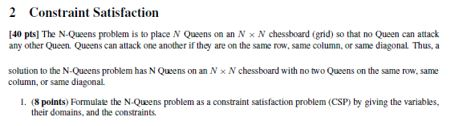

In [23]:
fig = Image(filename=("Q3.JPG"))
fig

# Solution for 1

A CSP has a set of variables, a domain for each varaibles, a set of constraints or evaluation function.

For the N-Queen problem the way we define the variables as
$Q_i$= column number of the Queen. Where i=1,...,N are unique values of i. And i represents the row number of that Queen in the grid.

The domain of these variables is the set {1,....,N}

The constraints for this problem are:

1) $Q_i \ne Q_j$ for $i\ne j$.
Meaning if the idexing of Queens are not same, than they cannot be on the same column.
Note that the unique indexing of the queens make sure that they are not on the same rows.

2) $|Q_i - Q_j| \ne |i - j|$ except when this difference is 0.
Meaning that if two queens are not indexed the same then the difference of their column numbers shall not equal the difference of their rows in absolute values. This restricts the queens to be on the same diagonal in both directions.


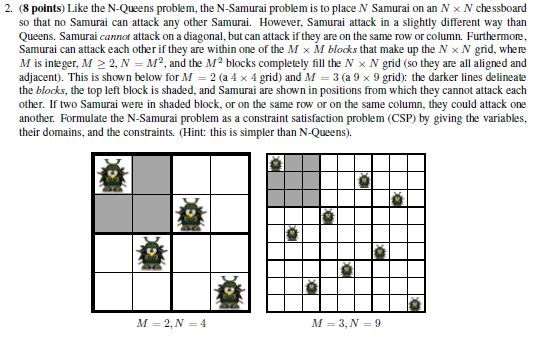

In [24]:
fig = Image(filename=("Q4.JPG"))
fig

# Solution for 2

We use our knowledge from previour part and make a few changes to turn the N samurai problem into a CSP. We notice that the only difference in the N queen problem and the N samurai problem is that, the queens can't be on the same diagonal, where as the Samurai can not be on the same square blocks with area of M x M. Hence, we restate everything else from the N queen representation for this problem and then extend to incorporate the new constraint.

From N Queen problem:

For the N-Samurai problem the way we define the variables as
$Q_i$= column number of each Samurai. Where i=1,...,N are unique values of i. And i represents the row number of that Samurai in the grid.


The domain of these variables is the set {1,....,N}

The constraints for this problem are:

1) $Q_i \ne Q_j$ for $i\ne j$.
Meaning if the idexing of Samurai are not same, than they cannot be on the same column.
Note that the unique indexing of the queens make sure that they are not on the same rows.

Now we introduce a new constraint, that is specific to the N-samurai problem.

2) $(floor(\frac{i}{M}), floor(\frac{Q_i}{M})) \ne (floor(\frac{j}{M}), floor(\frac{Q_j}{M}))$ for $i \neq j$.
Where floor(x) returns the integer that is equal to or less than x. This ensures that any two samurai's are not on the same block of size M x M, that is specified in the grid.

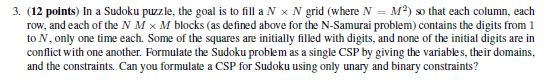

In [25]:
fig = Image(filename=("Q5.JPG"))
fig

# Solution for 3

Note that, since part of the question asks if the formulation can be done using unary and binary constraints only, hence, we will use a strategy to formulate the CSP which only uses the unary and binary constraints.

Although there are other ways to formulate this CSP, the way we have used in this solution is the extension of what we have created for the N-samurai problem. The fact that there are N different variables with similar properties as the N samurai problem, we add a couple of constraints to take that situation into account.

Variables:

$S_i$ = Column number of the the numeric symbol S, given that the row position of that symbol is i. For S = 1,...,N and i = 1,...,N.

Note that the Indexing for each variable will be unique, so for e.g. there cannot be more than 1 of the variables for $5_3$.

The domain of these variables is the set {1,....,N}

The constrains for this problem are:

1) $S_i \neq S_j $ for $i\neq j$.
Similar as the previous two problems, makes sure that each numeric symbols comes in each column, at most onces. Note that the row condition is satisfied by the uniqueness of indexing.

2) $(floor(\frac{i}{M}), floor(\frac{S_i}{M})) \ne (floor(\frac{j}{M}), floor(\frac{S_j}{M}))$ for $i \neq j$ and $\forall{S}$.
Similar to previous two problems, that is given a symbol S, this makes sure that no two S are in the same block of size M x M.

Following is a new constraint 

3) $S_i^j \neq S_i^k$ for $S^j$ and $S^k$ be two different symbols from the possible symbols.
What this essentially means is that given two different numbers, for e.g. 1 and 3, we cannot have them in the same cell, i.e. their row number and column number cannot be the same. 

Unary constrainst are defined as the constraints applying on each individual variable. Binary constraints are the constraints involving 2 diffent variables.
Note that there are only unary and Binary constraints in the above defined representation of CSP for this problem. If my solution is correct, than it is possible to write CSP for this problem in only unary and binary constraints.


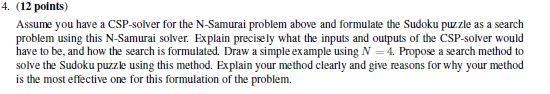

In [29]:
fig = Image(filename=("Q6.JPG"))
fig

In the suduko puzzle, with given some prefilled cells, the inputs of the problem will be a set of all symbols from 1,...,N such that the total number of 
$\bf{each}$ symbol, including the ones prefilled is equal to N.
The output of this solver will be the positioning of each of these symbols in a cell on the grid, such that all the constraints specified in the previous parts are satisfied.

After doing some experimentation on the possible ways the solver can be used, it was found that the depth first method will be the most effective method to solve this problem. Reason beign that the problem is so big, the A* method would fail due to memory problems. Whereas, one needs to go into deep steps to recognise if a value shall lie in cell or not, hence breath first search will be in efficient.

The way the problem will be solved using the CSP solver for the N-samurai problem will be.

1) Given the prefilled cells grid, we will start by choosing a particular symbol, lets say 1

2) The we will solve the problem as a N-samurai problem, with just this added restriction that the new symbol cannot take the position of the prefilled cells.

3) We keep on assigning values in the depth first manner, until we have assigned all positions for the symbol 1.

4) Then we move on to the next symbol and do the same for this new symbol. 

5) We back track and correct the values if we get stuck at a particular value that does not satisfy the constraints.



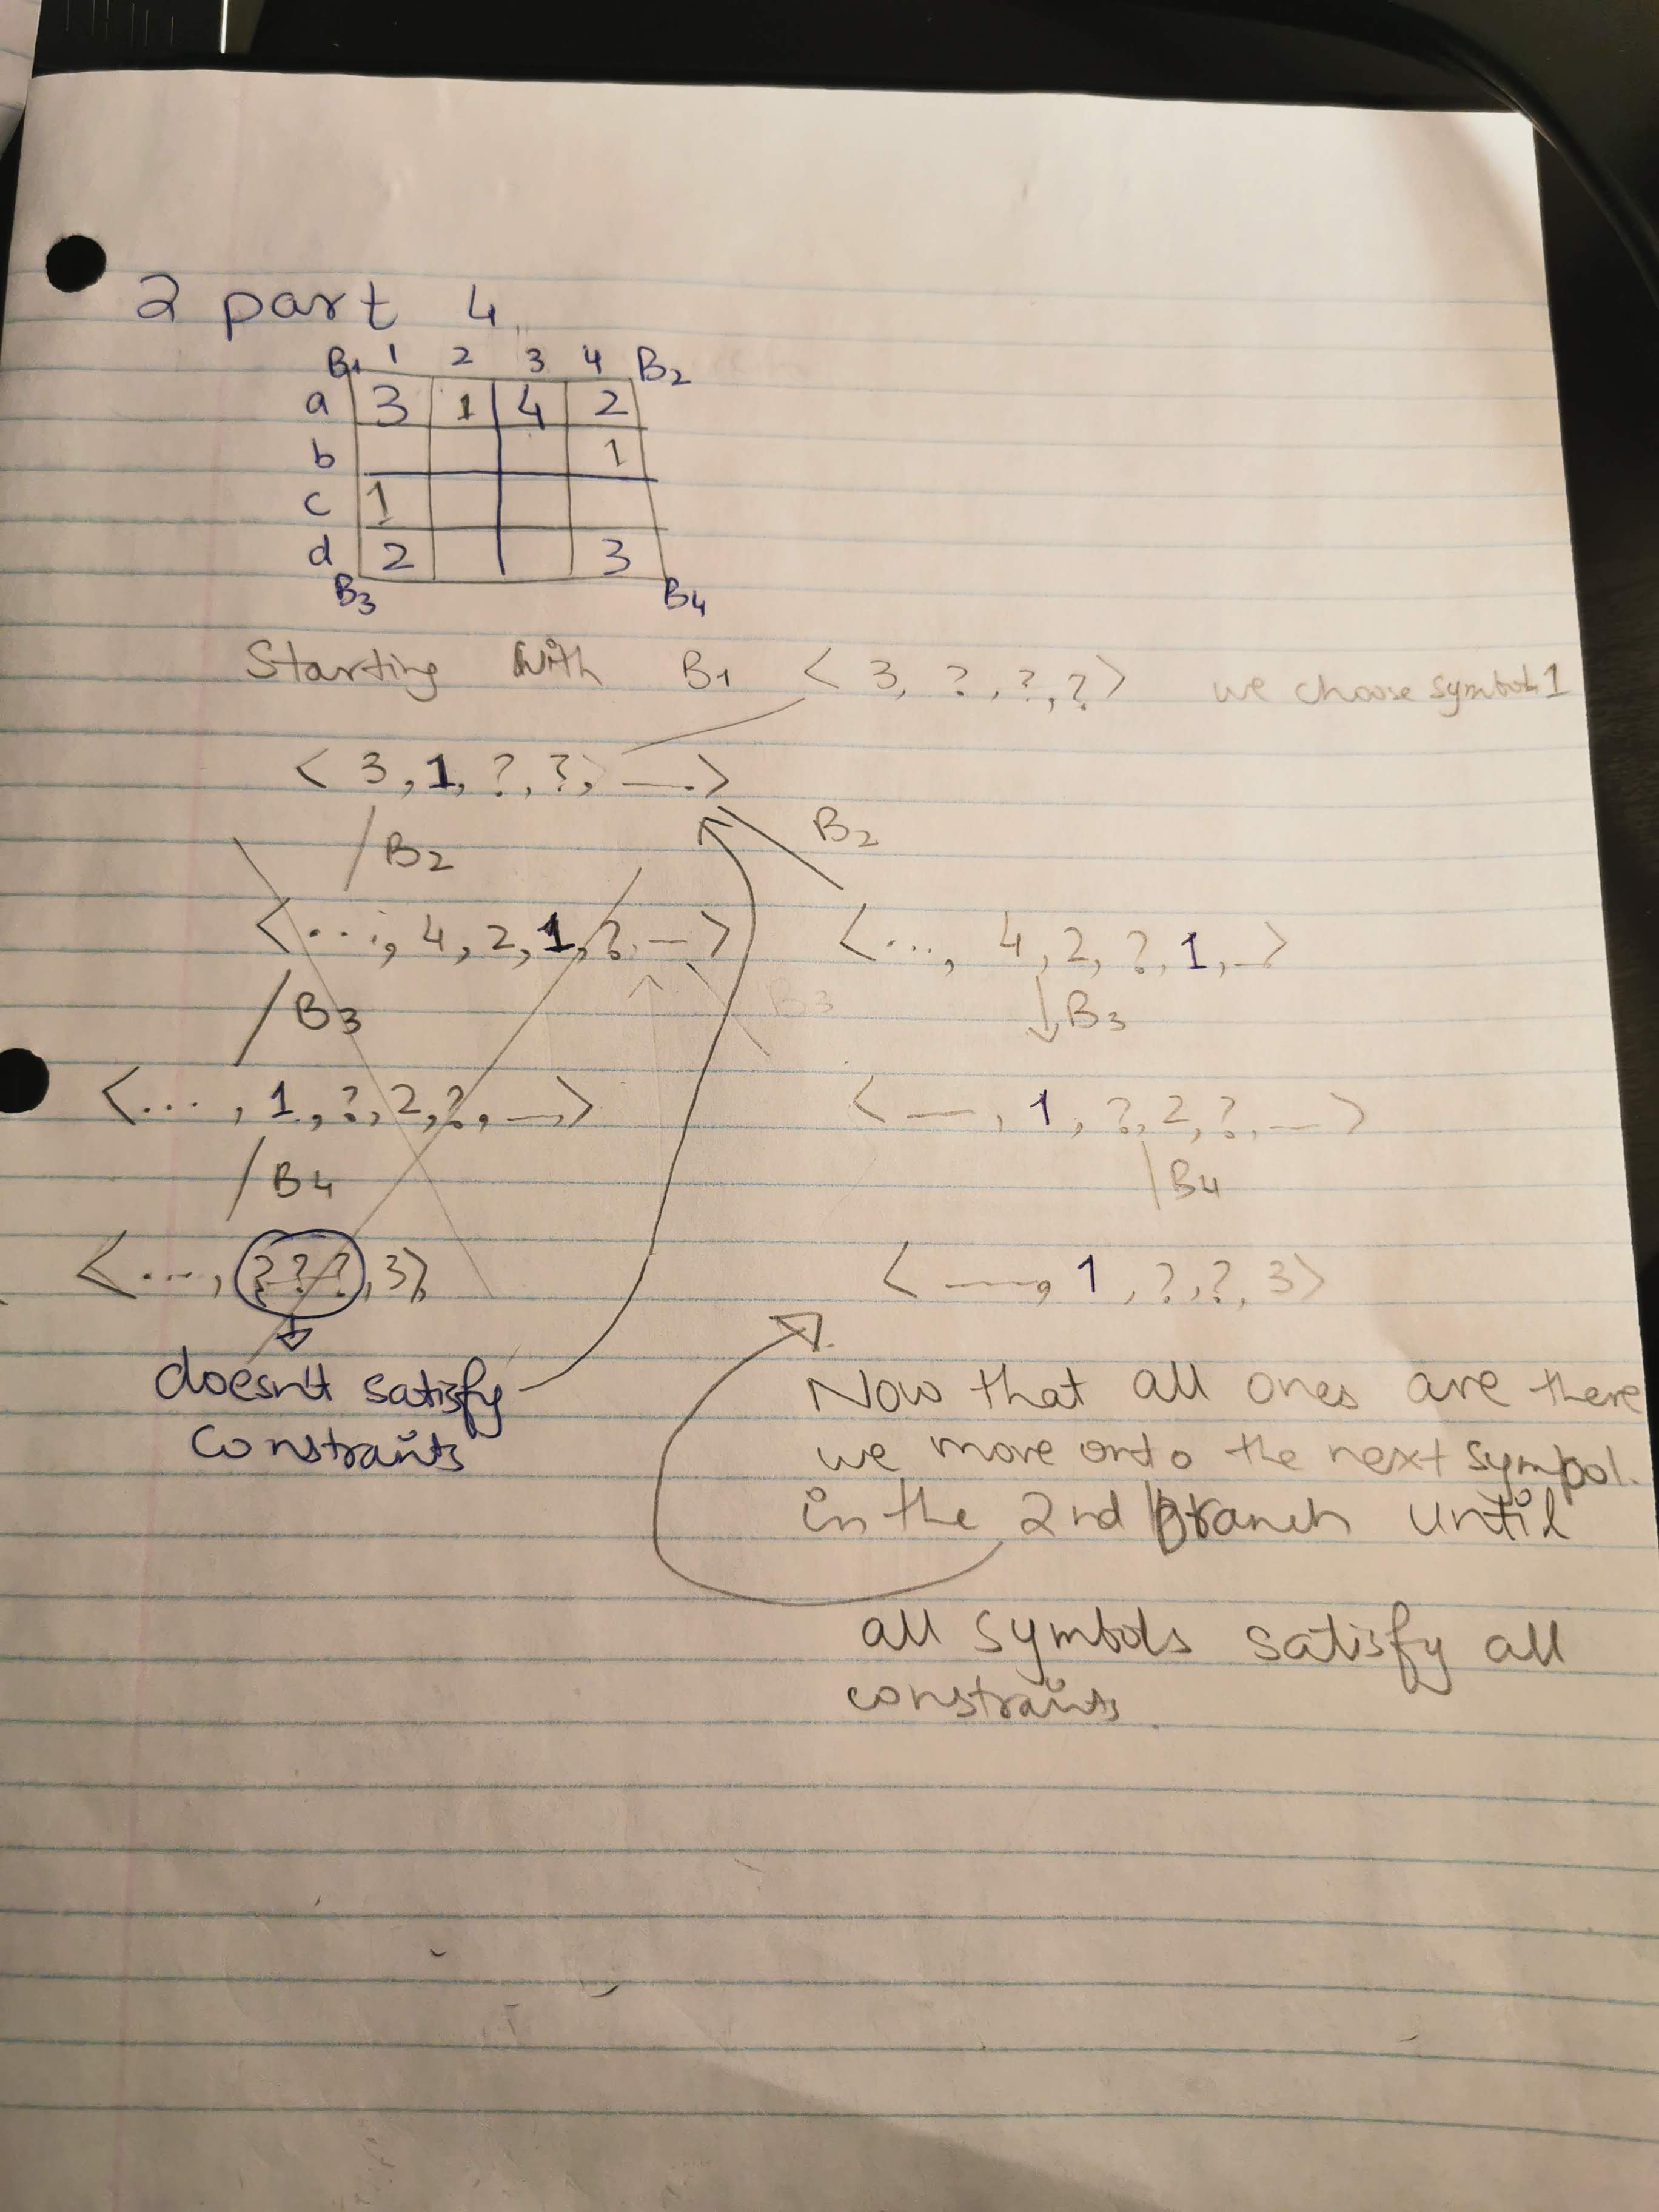

In [30]:
fig = Image(filename=("part_4.jpg"))
fig

Note that above is a partially searched algorithm for the depth first serach. Note that, there comes a mistake when 1 is placed in the wrong position, and block 4 does not have any position that satisfies for 1, so it back tracks and fixes the problem and continues. The search continues this way until a solution is reached. 